In [1]:
#导包
import math

%matplotlib inline
import matplotlib.pyplot as plt

import numpy as np

import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
import torchvision
import torchvision.transforms as transforms

In [2]:
transform = transforms.Compose(
    [transforms.ToTensor(),
     transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))])

batch_size = 4

trainset = torchvision.datasets.CIFAR10(root='./data', train=True,  download=False, transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=batch_size,  shuffle=True, num_workers=2)
testset = torchvision.datasets.CIFAR10(root='./data', train=False,  download=False, transform=transform)
testloader = torch.utils.data.DataLoader(testset, batch_size=batch_size,  shuffle=False, num_workers=2)
classes = ('plane', 'car', 'bird', 'cat','deer', 'dog', 'frog', 'horse', 'ship', 'truck')

In [3]:
#展示一组示例数据

#可视化函数
def imshow(img):
    img = img / 2 + 0.5     # unnormalize
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1, 2, 0)))
    plt.show()

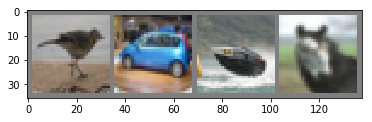

 bird             car            ship           horse


In [4]:
#随机获取一组训练数据
dataiter = iter(trainloader)
images, labels = dataiter.next()

#展示图片
imshow(torchvision.utils.make_grid(images))
#打印标签
print('           '.join('%5s' % classes[labels[j]] for j in range(batch_size)))

In [5]:

#建立模型
class Net(nn.Module):
    def __init__(self,input_channel=3,h=32,w=32,hidden_channel=[6,16],conv_kernel_size=5,pool_kernel_size=2,pool_stride=2,
                hidden_dim=[120,84],output_dim=10):
        """hidden_channel和hidden_dim接受int和list两种格式，其他参数只接受如示例格式"""
        super().__init__()
        if isinstance(hidden_channel,int):
            hidden_channel=[hidden_channel,hidden_channel]
        if isinstance(hidden_dim,int):
            hidden_dim=[hidden_dim,hidden_dim]
        self.conv1 = nn.Conv2d(input_channel,hidden_channel[0],conv_kernel_size)
        h2=math.floor(h-conv_kernel_size+1)
        #print(h2)
        w2=math.floor(w-conv_kernel_size+1)
        #print(w2)
        self.pool = nn.MaxPool2d(pool_kernel_size,pool_stride)
        h3=math.floor((h2-pool_kernel_size)/pool_stride+1)
        #print(h3)
        w3=math.floor((w2-pool_kernel_size)/pool_stride+1)
        #print(w3)
        self.conv2 = nn.Conv2d(hidden_channel[0],hidden_channel[1],conv_kernel_size)
        h4=math.floor(h3-conv_kernel_size+1)
        #print(h4)
        w4=math.floor(w3-conv_kernel_size+1)
        #print(w4)
        h5=math.floor((h4-pool_kernel_size)/pool_stride+1)
        #print(h5)
        w5=math.floor((w4-pool_kernel_size)/pool_stride+1)
        #print(w5)
        self.fc1_input_dim=hidden_channel[1]*h5*w5
        self.fc1 = nn.Linear(self.fc1_input_dim,hidden_dim[0])
        self.fc2 = nn.Linear(hidden_dim[0],hidden_dim[1])
        self.fc3 = nn.Linear(hidden_dim[1],output_dim)

    def forward(self, x):
        x = self.pool(F.relu(self.conv1(x)))
        x = self.pool(F.relu(self.conv2(x)))
        x = x.view(-1,self.fc1_input_dim)
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x)
        return x

In [8]:
#设置超参
device=('cuda:0' if torch.cuda.is_available() else 'cpu')
learning_rate=0.01
momentum=0.9


epoch=50


net_hyperparameter={'hidden_channel':[6,8],'conv_kernel_size':5,'pool_kernel_size':2,'pool_stride':2,'hidden_dim':64}


#建立pipeline
net = Net(**net_hyperparameter)
net.to(device)

criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(net.parameters(), lr=learning_rate, momentum=momentum)

for e in range(epoch):
#     total=0
    total_loss = 0.0
    for i, data in enumerate(trainloader, 0):
        inputs, labels = data[0].to(device), data[1].to(device)

        optimizer.zero_grad()
        outputs = net(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        total_loss += loss.item()
#         total += labels.size(0)
    print('第'+str(e+1)+'个epoch上的总损失函数为：'+str(total_loss))
print('Finished Training')

第1个epoch上的总损失函数为：25338.639153659344
第2个epoch上的总损失函数为：24802.11428231001
第3个epoch上的总损失函数为：24750.51028251648
第4个epoch上的总损失函数为：24704.955198585987
第5个epoch上的总损失函数为：24719.455941677094
第6个epoch上的总损失函数为：24916.954413056374
第7个epoch上的总损失函数为：24944.046851575375
第8个epoch上的总损失函数为：24830.312981188297
第9个epoch上的总损失函数为：24700.013671278954
第10个epoch上的总损失函数为：24906.223105072975
第11个epoch上的总损失函数为：24901.216516017914
第12个epoch上的总损失函数为：24755.372297763824
第13个epoch上的总损失函数为：24706.961719691753
第14个epoch上的总损失函数为：24817.198736310005
第15个epoch上的总损失函数为：24834.534412443638
第16个epoch上的总损失函数为：24811.84026503563
第17个epoch上的总损失函数为：24521.42709618807
第18个epoch上的总损失函数为：24469.2675999403
第19个epoch上的总损失函数为：24722.06168615818
第20个epoch上的总损失函数为：24711.359256863594
第21个epoch上的总损失函数为：24562.361785650253
第22个epoch上的总损失函数为：24489.673620045185
第23个epoch上的总损失函数为：24708.68262219429
第24个epoch上的总损失函数为：24549.172174870968
第25个epoch上的总损失函数为：24663.796738147736
第26个epoch上的总损失函数为：24596.913488149643
第27个epoch上的总损失函数为：24446.183140158653
第28个epoch上的总损失函数为：

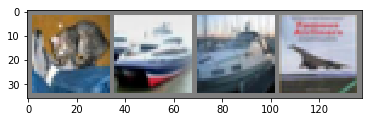

GroundTruth:   cat  ship  ship plane


In [9]:

#输出模型预测结果的示例
dataiter = iter(testloader)
images, labels = dataiter.next()

# print images
imshow(torchvision.utils.make_grid(images))
print('GroundTruth:', ' '.join('%5s' % classes[labels[j]] for j in range(4)))

In [10]:
#打印模型在测试集上的准确率
correct = 0
total = 0
with torch.no_grad():
    for data in testloader:
        images, labels = data[0].to(device), data[1].to(device)
        outputs = net(images)
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

print('模型在'+str(total)+'张测试集图片上的准确率为：%d%%' % (100 * correct / total))

模型在10000张测试集图片上的准确率为：22%
